> ## 5 모델 평가와 성능 향상

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### 지금까지 지도 학습 모델을 사용하던 과정 

In [2]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


- 훈련 세트와 테스트 세트로 나누는 이유는 일반화의 정도를 측정하기 위해서였음
- 평가를 위해서 정확도, $R^2$ 값 등 

## 5.1 교차 검증

- 데이터를 여러 번 반복해서 나누고 여러 모델을 학습
- k-겹 교차 검증(k-fold cross-validation)이 가장 널리 사용
- k는 5 또는 10을 사용

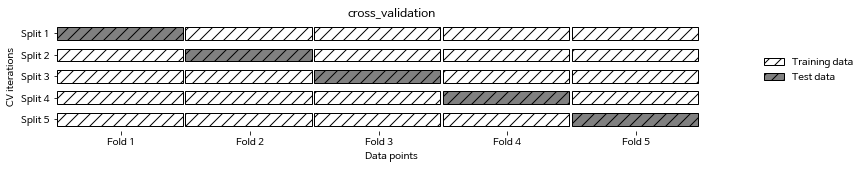

In [3]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [1.         0.96666667 0.93333333 0.9        1.        ]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

In [9]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


- 이 모델의 정확도가 대략 96%일 것이라고 기대할 수 있음
- 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문

### 5.1.2 교차 검증의 장점

- 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어감
- 교차 검증의 점수를 높이기 위해서는 데이터의 모든 샘플에 모델이 잘 일반화 되어야 함
- 모델이 훈련 데이터에 얼마나 민감한지 알 수 있음
- 연산 비용이 늘어나는 것은 단점

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [10]:
print("Iris 레이블:\n{}".format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 위의 예시와 같이 순서대로 k개의 폴드로 나누는 것은 좋지 않을 수 있음

#### 계층별 k-겹 교차 검증(stratified k-fold cross-validation)

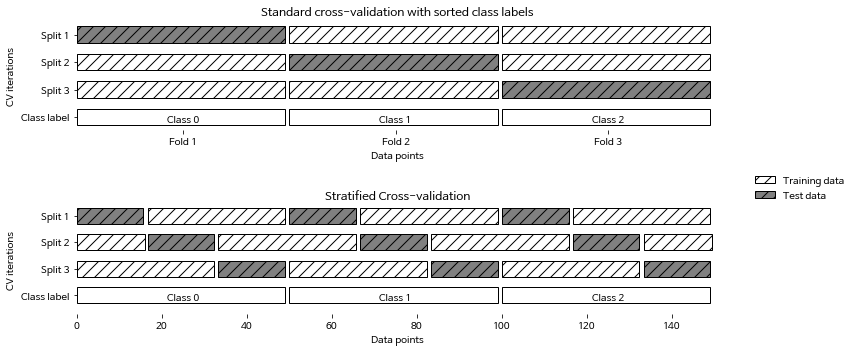

In [11]:
mglearn.plots.plot_stratified_cross_validation()

- 샘플의 90%가 A클래스, 10%가 B클래스일 때, 각 폴드에 A클래스 90%, B클래스 10%로 만듬

#### 교차 검증 상세 옵션

- 다른 사람의 결과를 재현하기 위해

In [3]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [13]:
print("교차 검증 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

#### iris 데이터셋에 3-겹 교차 검증을 사용하면?

In [4]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0. 0. 0.]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 데이터 분할 전에 섞어줌

In [6]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0.9  0.96 0.96]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

#### LOOCV(Leave-one-out cross-validation)

- 폴드 하나에 샘플 하나만 들어있는 k-겹 교차 검증
- 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용
- 작은 데이터셋에서 더 좋은 결과를 만들어 낼 수 있음

In [10]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will 

In [11]:
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.95


#### 임의 분할 교차 검증

- train_size만큼의 포인트로 훈련 세트를, test_size만큼의 포인트로 테스트 세트 만듬
- 분할은 n_splits 만큼 반복

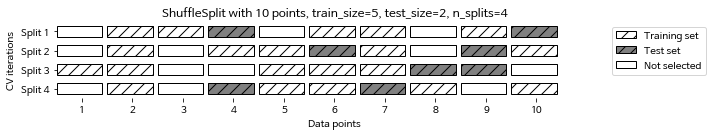

In [12]:
mglearn.plots.plot_shuffle_split()

In [14]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.98666667 0.89333333 0.86666667 0.96       0.92       0.94666667
 0.94666667 0.93333333 0.90666667 0.90666667]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

- 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용
- 대규모 데이터셋으로 작업할 때 도움
- 계층별 버전으로 분류 작업에 더 적합한 StratifiedShuffleSplit도 있음

#### 그룹별 교차 검증

- 데이터 안에 매우 연관된 그룹이 있을 때
- groups 배열 지정: 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹
- 클래스 레이블과 혼동을 해서는 안됨
- 얼굴 인식에서 완전히 새로운 사람의 얼굴 표정을 테스트 한다고 가정할 때
- 음성 인식에서 새로운 사람의 대화를 인식하는 테스트를 한다고 가정할 때

#### groups 배열 지정의 예

In [15]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.75       0.8        0.66666667]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

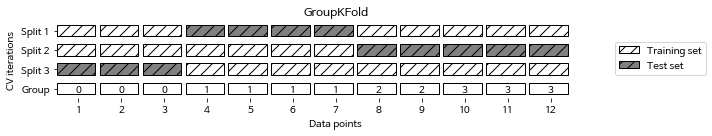

In [16]:
mglearn.plots.plot_group_kfold()

- KFold, StratifiedKFold, GroupKFold를 가장 널리 사용

## 5.2 그리드 서치

- 매개변수를 튜닝하여 일반화 성능을 개선

### 5.2.1 간단한 그리드 서치

In [18]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("훈련 세트의 크기: {}    테스트 세트의 크기: {}".format(
    X_train.shape[0], X_test.shape[0]))

훈련 세트의 크기: 112    테스트 세트의 크기: 38


In [20]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC 평가
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: {}".format(best_parameters))

최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


- 여러 조합으로 테스트 세트 정확도가 가장 높은 조합을 선택
- 따라서 매우 낙관적인 결과이며, 정확도는 새로운 데이터에까지 이어지지 않을 수 있음

### 5.2.2 매개 변수 과대적합과 검증 세트

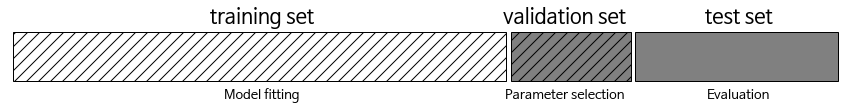

In [21]:
mglearn.plots.plot_threefold_split()

- 검증 세트로 최적의 매개변수를 선택
- 그 매개변수에서 훈련 세트와 검증 세트 데이터로 다시 모델을 만듬

In [22]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("훈련 세트의 크기: {}    검증 세트의 크기: {}    테스트 세트의 크기: {}"
     "\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

훈련 세트의 크기: 84    검증 세트의 크기: 28    테스트 세트의 크기: 38



In [24]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters) # 리스트를 item으로 풀어줄 땐 *, 딕셔너리 인 경우 **
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.96
최적 매개변수:  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.92


- 마지막 평가를 위해 테스트 세트를 보관하는 것이 좋은 방법

### 5.2.3 교차 검증을 사용한 그리드 서치

- 교차 검증을 사용해서 각 매개변수 조합의 성능을 평가하 수 있음

In [25]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


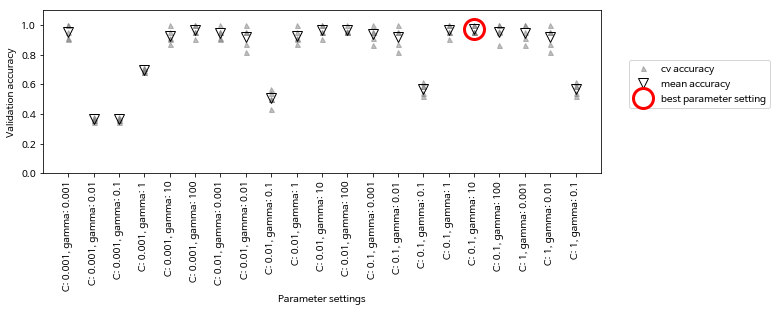

In [26]:
mglearn.plots.plot_cross_val_selection()

- 5-겹 교차 검증으로 C와 gamma 설정에 대한 SVM의 정확도를 평가하려면 36x5의 모델 필요
- 교차 검증의 단점은 이 모델들을 학습시키는 데 필요한 시간과 비용

#### 데이터를 나누고 그리드 서치를 적용하여 최종 매개변수를 평가하는 전체 과정

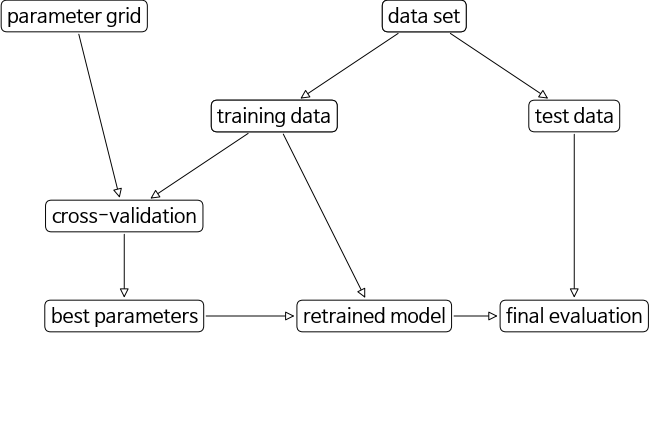

In [27]:
mglearn.plots.plot_grid_search_overview()

#### scikit-learn에서 구현된 GridSearchCV

In [28]:
# 딕셔너리 형태로 저장
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [31]:
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최상 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 100, 'gamma': 0.01}
최상 교차 검증 점수: 0.97


In [32]:
print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))

최고 성능 모델:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### 교차 검증 결과 분석

- 교차 검증의 결과를 시각화하면 매개변수가 일반화에 얼마나 영향 주는지 이해할 때 도움
- 그리드 서치는 연산 비용이 매우 크므로 비교적 간격을 넓게 하여 적은 수 그리드로 시작
- 그리드 서치의 결과는 cv_results_ 속성에 담겨 있음
- 결과는 DataFrame으로 변환해서 보는 것이 좋음

In [33]:
results = pd.DataFrame(grid_search.cv_results_)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

In [36]:
print(results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.000694      0.000243         0.000298        0.000243   0.001   
1       0.000795      0.000241         0.000197        0.000241   0.001   
2       0.000701      0.000238         0.000291        0.000238   0.001   
3       0.000691      0.000246         0.000292        0.000239   0.001   
4       0.000780      0.000232         0.000297        0.000243   0.001   

  param_gamma                        params  split0_test_score  \
0       0.001  {'C': 0.001, 'gamma': 0.001}              0.375   
1        0.01   {'C': 0.001, 'gamma': 0.01}              0.375   
2         0.1    {'C': 0.001, 'gamma': 0.1}              0.375   
3           1      {'C': 0.001, 'gamma': 1}              0.375   
4          10     {'C': 0.001, 'gamma': 10}              0.375   

   split1_test_score  split2_test_score       ...         mean_test_score  \
0           0.347826           0.363636       ...                0.366071  

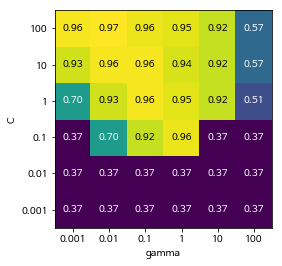

In [38]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

- 히트맵을 보고 알 수 있는 것: SVC는 매개변수 설정에 매우 민감

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


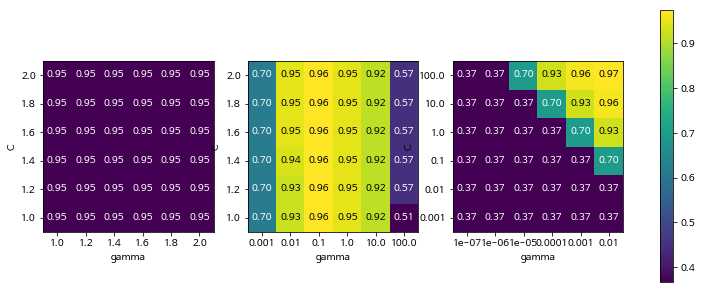

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

- 첫 번째 그래프는 C와 gamma의 스케일과 범위가 부적절한 경우
- 두 번재 그래프는 gamma 매개변수만 정확도에 영향을 준다는 것
- 세 번째 그래프는 최적치가 그래프 경계에 있으니 매개변수 검색 범위를 바꿔줘야 함 

#### 비대칭 매개변수 그리드 탐색

- 어떤 경우에는 모든 매개변수 조합에 대해 GridSearchCV를 하는 것이 좋은 생각이 아님
- 예를들어 SVC는 커널에 따라 매개변수들이 결정되기 때문

In [41]:
param_grid = [{'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print("그리드 목록:\n{}".format(param_grid))

그리드 목록:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [42]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
results = pd.DataFrame(grid_search.cv_results_)

In [46]:
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000680351,0.000592566,0.00059495,0.000792313,0.000787497,0.000990057,0.000495958,0.000496244,0.000589848,0.000595236,...,0.000297594,0.000496054,0.000992012,0.000991821,0.000396824,0.000297594,0.000297642,0.000396919,0,0
std_fit_time,0.000241453,0.000187252,0.000197959,0.000244256,0.000237305,4.37185e-06,1.78416e-07,1.51241e-06,0.000185611,0.000198412,...,0.000242985,1.16801e-07,9.53674e-08,1.50789e-07,0.000198412,0.000242985,0.000243023,0.00019846,0,0
mean_score_time,0.000298643,0.000389338,0.000297689,0.000297785,0.00040288,0.00019846,0,0.000495195,0.000495577,9.91821e-05,...,0.000297689,0.000198364,0,0,0.000198412,0.000297594,0.00019846,0.000198317,0.000495863,0.000495863
std_score_time,0.000243846,0.000195222,0.000243063,0.00024314,0.000201837,0.000243062,0,1.49274e-06,1.01825e-06,0.000198364,...,0.000243062,0.000242946,0,0,0.000243004,0.000242985,0.000243062,0.000242887,9.53674e-08,9.53674e-08
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


#### 그리드 서치에 다양한 교차 검증 적용

- GridSearchCV에는 기본적으로 분류에 계층형 k-겹 교차 검증 회귀에는 k-겹 교차 검증
- 다른 교차 검증 분할기를 사용할 수도 있음

#### 중첩 교차 검증

- GridSearchCV를 사용할 때 여전히 훈련 세트와 테스트 세트로 밖에 나누지 않음
- 결과가 불안정하고 테스트 데이터의 분할에 크게 의존함
- 기존의 방식에서 더 나아가 교차 검증 분할 방식을 사용할 수 있음
- 모델이나 매개변수 설정이 아닌 테스트 점수의 목록을 만들어 줌(일반화의 정도)
- 미래의 데이터에 적용하기 위한 모델을 찾는 데는 거의 사용하지 않음

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                        iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수:  0.9800000000000001


- param_grid 매개변수의 조합은 42개, 안쪽과 바깥쪽 각 5번의 루프 -> 1050개 모델

#### 중첩 교차 검증 for문으로 구현

In [50]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수 찾기
        best_params = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듬
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듬
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [51]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                  StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]


#### 교차 검증과 그리드 서치 병렬화

- 그리드 서치는 데이터 용량이 크고 매개변수 수가 많으면 사용 힘듬, 그러나 병렬화 쉬움
- 하나의 교차 검증 분할에서 특정 매개변수 설정을 사용해 모델을 만드는 일은 다른 매개변수 설정이나 모델과 전혀 상관없이 진행할 수 있기 때문
- 그러므로 n_jobs 매개변수에 사용할 CPU 코어 수를 지정 가능

## 5.3 평가 지표와 측정

### 5.3.1 최종 목표를 기억하라

- 비즈니스 임팩트: 머신러닝 애플리케이션에서 특정 알고리즘을 선택하여 나타난 결과
- 머신러닝 평가 지표를 선택하기 전 고차원적인 목표를 생각해야 함

### 5.3.2 이진 분류의 평가 지표

- 가장 널리 사용하고 개념도 쉬운 머신러닝 알고리즘
- 양성(관심) 클래스와 음성 클래스가 있음

#### 에러의 종류

- 잘못 분류된 샘플의 수만 원하는 정보가 아니므로 정확도만으로는 예측 성능 측정 부족
- False Positive: 거짓 양성, 타입 I 에러
- False Negative: 거짓 음성, 타입 II 에러 (최대한 피해야 함)

#### 불균형 데이터셋

- 두 종류의 에러는 두 클래스 중 하나가 다른 것보다 훨씬 많을때 더 중요
- 예를들어, 인터넷 광고 클릭 데이터 
- 클릭 아님 데이터가 99%의 정확도라면 무조건 '클릭 아님'으로 예측해도 정확도 99% 

In [52]:
# 불균형 데이터 셋
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [53]:
# 항상 다수인 클래스를 예측하는 분류기
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 유니크 레이블: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.90


- 거의 아무것도 학습하지 않고 90%의 정확도

#### 다른 분류기들로 확인

In [55]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [64]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.828889
logreg 점수: 0.98


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 오차행렬

- 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법

In [65]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[401   2]
 [  8  39]]


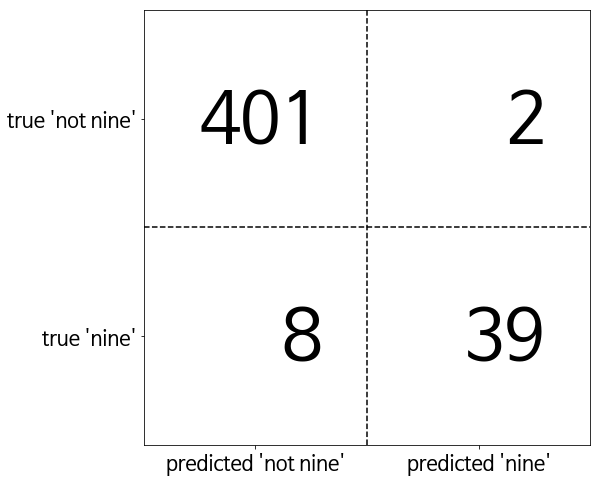

In [66]:
mglearn.plots.plot_confusion_matrix_illustration()

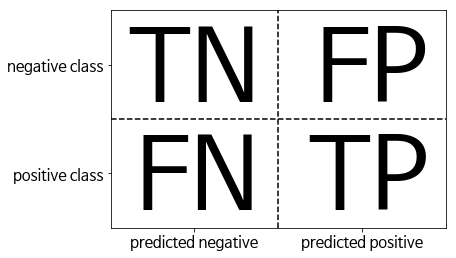

In [67]:
mglearn.plots.plot_binary_confusion_matrix()

In [68]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀:")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[359  44]
 [ 45   2]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[401   2]
 [  8  39]]


- 오차 행렬을 조사하면 많은 정보를 얻음, 그러나 매우 수동적이며 정성적인 방법

#### 정확도와의 관계

## <center>정확도 = $\frac{TP + TN}{TP + TN + FP + FN}$</center>

#### 정밀도

## <center>$\frac{TP}{TP+FP}$</center>

- 양성으로 예측된 것 중 얼마나 많은 샘플이 진짜 양성인지
- 양성 예측도(PPV)라고도 함

#### 민감도

## <center>$\frac{TP}{TP + FN}$</center>

- 모든 양성 샘플을 식별해야 할 때 사용하는 성능 지표
- 거짓 음성(FN)을 피해야 하는 것이 중요
- 재현율, 적중률, 진짜 양성 비율(TPR)

#### 정밀도와 민감도의 관계

- 모든 샘플을 TN이 하나도 없고 모두 양성 클래스에 속한다고 예측하면
- 거짓 음성 FN이 없어져 민감도가 완벽
- 하지만 모든 샘픙를 양성으로 예측하면 FP를 많이 만들게 되고 정밀도는 매우 낮아짐
- 반대로 데이터 포인트 하나만 양성이고 나머지를 음성이라고 예측한다면 정밀도는 완벽

#### 정밀도와 민감도의 조화평균인 f-점수

## <center>$F = 2 X \frac{정밀도 x 민감도}{정밀도 + 민감도}$</center>

- 불균형한 이진 분류 데이터셋에는 정확도보다 더 나은지표가 될 수 있음

In [69]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.04
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- 정확도에서는 볼 수 없었던 뚜렷한 차이를 볼 수 있음
- 다만 f-점수는 정확도보다 이해하거나 설명하기 어려움
- classification_report 함수는 정밀도, 민감도, f-점수 모두를 계산해서 출력해 줌

#### classification_report로 결과 종합해서 보기

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                           target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\JH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
print(classification_report(y_test, pred_dummy,
                           target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.89      0.89       403
           9       0.04      0.04      0.04        47

   micro avg       0.80      0.80      0.80       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.80      0.80      0.80       450



In [72]:
print(classification_report(y_test, pred_logreg,
                           target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



#### 불확실성 고려

- 오차 행렬과 분류 리포트는 예측 결과의 분석을 도움
- 하지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태
- 대부분의 분류기는 예측의 가늠을 위해서 decision_function, predict_proba
- 이진 탐색에서 decision_function, predict_proba의 임계값은 각각 0, 0.5

In [74]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


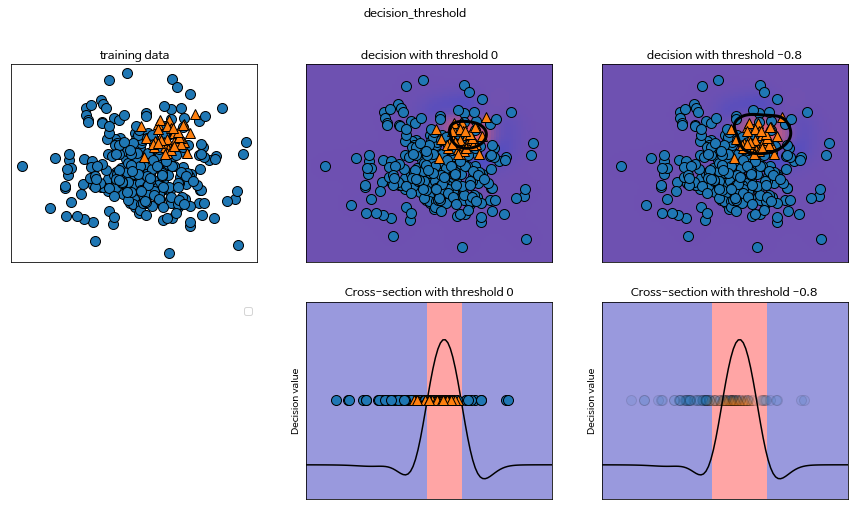

In [75]:
mglearn.plots.plot_decision_threshold()

In [76]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [79]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [80]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



- 임의의 임계값보다는 확률을 사용하는 쪽이 더 직관적
- 그러나 모든 모델이 쓸모 있는 불확실성을 제공하는 것은 아님
- 최대 깊이까지 자란 의사결정나무는 잘못된 것이라도 100% 확신
- 보정(calibration) 개념과 관련이 있음
- Alexandru Niculescu-Mizil, Rich Caruana 
- 『Predicting Good Probabilities with Supervised Learning』

#### 정밀도-민감도 곡선과 ROC 곡선

- 임계값을 바꾸는 것은 해당 분류기의 정밀도와 민감도의 상충 관계를 조정하는 일
- 특정 목적을 충족하는 임계값을 설정하는 것은 언제든 가능
- 90%의 민감도처럼 분류기의 필요조건을 지정하는 것 -> 운영 포인트
- 운영 포인트가 명확하지 않은 경우? -> 모든 임계갑 조사 or 정밀도-민감도 곡선

In [81]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, '민감도')

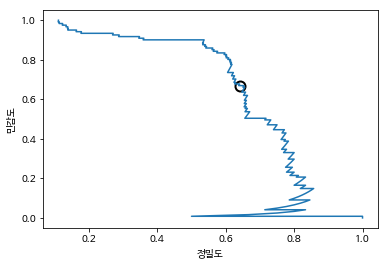

In [85]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾음
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-민감도 곡선")
plt.xlabel("정밀도")
plt.ylabel("민감도")

- 오른쪽 위에 가까워야 이상적
- 곡선의 각 포인트는 모든 임계값에 대응
- 검은 원은 임계값이 0인 지점
- 정밀도가 높아져도 민감도가 높게 유지될수록 더 좋은 모델

#### 랜덤 포레스트와 SVM 모델의 곡선

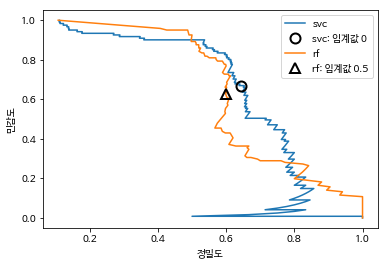

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="svc: 임계값 0", fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
        markersize=10, label="rf: 임계값 0.5", fillstyle='none', mew=2)
plt.xlabel("정밀도")
plt.ylabel("민감도")
plt.legend(loc="best")

- 극단적인 부분에서는 랜덤 포레스트 우세
- 가운데 근처에서는 SVM이 우세
- f-점수만으로 전체 성능을 비교한다면 이런 세세한 부분을 놓칠 수 있음

In [92]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


- 정밀도-민감도 곡선의 아랫부분 면적을 계산한 것: 평균 정밀도

In [97]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


- 무작위로 예측하는 분류기의 decision_function의 평균정밀도는
- 데이터셋에 있는 양성 클래스의 비율이 됨

#### ROC 곡선

- 여러 임계값에서 분류기의 특성을 분석하는 데 널리 사용하는 도구
- 정밀도와 민감도 대신 진짜 양성 비율과 거짓 양성 비율을 나타냄

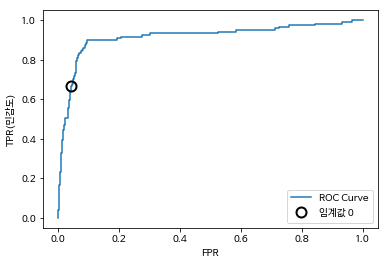

In [99]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(민감도)")
# 0 근처의 임계값을 찾음
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label="임계값 0", fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

- 왼쪽 위에 가까워야 이상적
- FPR을 조금 늘리면 민감도를 아주 크게 높일 수 있음
- 임계값을 고르기 위해서는 마찬가지로 테스트 세트를 사용해서는 안되고 검증 세트 활용

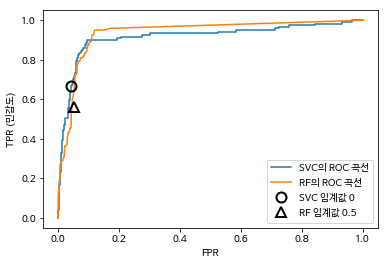

In [103]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (민감도)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label="SVC 임계값 0", fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
        label="RF 임계값 0.5", fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

#### AUC(area under the curve)

- ROC 곡선 아래의 면적

In [104]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


- 데이터 셋에 담긴 클래스가 아무리 불균형 해도 무작위로 예측한 AUC 값은 0.5
- 불균형한 데이터에는 정확도보다 AUC가 훨씬 좋은 지표
- 양성 샘플의 순위를 평가하는 것으로 볼 수 있음

gamma = 1.00    정확도 = 0.90    AUC = 0.50
gamma = 0.10    정확도 = 0.90    AUC = 0.96
gamma = 0.01    정확도 = 0.90    AUC = 1.00


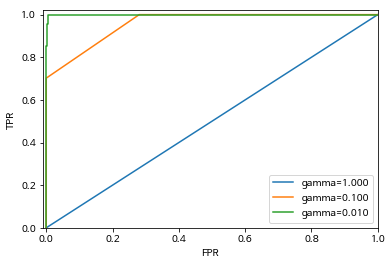

In [110]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f}    정확도 = {:.2f}    AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

- 세 가지 gamma 값에 대한 정확도는 90%로 모두 같음
- 그러나 AUC와 ROC 곡선에서는 차이가 뚜렷
- 이 데이터는 gamma=0.01에서 아주 높은 예측 성능을 얻을 수 있음
- 불균형한 데이터셋에서 모델을 평가할 때는 AUC를 사용해야 함

### 5.3.3 다중 분류의 평가 지표

- 기본적으로 다중 분류를 위한 지표는 모두 이진 분류 평가 지표에서 유도됨
- 클래스가 불균형할 때는 역시 정확도가 좋은 평가 방법이 되지 못함

#### 오차 행렬

In [111]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


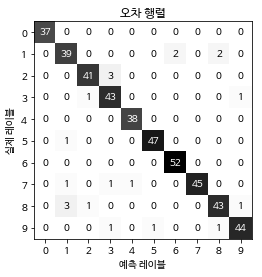

In [113]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel="예측 레이블",
    ylabel="실제 레이블", xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("오차 행렬")
plt.gca().invert_yaxis()

#### f-점수

In [114]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



- micro avg
    - 클래스별 f-점수에 가중치를 안줌, 모든 클래스를 같은 비중(크기 상관x)
    - 각 샘플을 똑같이 간주한다면 좋은 방법


- macro avg
    - 평균은 모든 클래스의 FP, FN TP의 총 수를 헤아림
    - 정밀도, 민감도, f- 점수를 이 수치로 계산
    - 각 클래스를 동일한 비중으로 고려한다면 좋은 방법


- weighted avg
    - 클래스별 샘플 수로 가중치, f-점수의 평균을 계산함
    - 이 값이 분류 리포트에 나타나는 값

In [115]:
print("micro 평균 f1 점수: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 5.3.4 회귀의 평가 지표

- 타깃을 과대 예측한 것 대비 과소 예측한 것을 분석
- 대부분은 회귀 추정기의 score 메서드 $R^2$만으로 충분

### 5.3.5 모델 선택에서 평가 지표 사용하기

- GridSearchCV나 cross_val_score를 사용할 때도 AUC 같은 평가지표를 원할 때가 있음
- scoring 매개변수에 roc_auc라고 지정하면 됨

In [116]:
print("기본 평가 지표: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
                                   scoring="accuracy")
print("정확도 지표: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
                          scoring="roc_auc")
print("AUC 지표: {}".format(roc_auc))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change

기본 평가 지표: [0.89983306 0.89983306 0.89983306]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change

정확도 지표: [0.89983306 0.89983306 0.89983306]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change

AUC 지표: [0.99372294 0.98957947 0.99594929]


#### GridSearchCV에서도 가능

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드 생성
param_grid = {"gamma": [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 매개변수:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


정확도 지표를 사용한 그리드 서치
최적의 매개변수: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도): 0.970
테스트 세트 AUC: 0.992
테스트 세트 정확도: 0.973


#### AUC 지표 사용

In [124]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("AUC 지표를 사용한 그리드 서치")
print("최적의 매개변수:", grid.best_params_)
print("최상의 교차 검증 점수(AUC): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


AUC 지표를 사용한 그리드 서치
최적의 매개변수: {'gamma': 0.01}
최상의 교차 검증 점수(AUC): 0.997
테스트 세트 AUC: 1.000
테스트 세트 정확도: 1.000


- 교차 검증과 테스트 세트에 대한 정확도 차이가 두 경우 모두 일관됨
- 하지만 AUC를 사용한 것이 AUC와 정확도 측면에서 더 나은 매개변수를 찾음
- scoring 매개변수의 중요한 옵션은 아래와 같음

#### scoring 매개변수의 옵션들

In [128]:
from sklearn.metrics.scorer import SCORERS
print("가능한 평가 방식:\n{}".format(sorted(SCORERS.keys())))

가능한 평가 방식:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


## 5.4 요약 및 정리

① 교차 검증을 해야 한다.
- 교차 검증 또는 테스트 세트를 사용하면 머신러닝 모델의 미래 성능을 평가할 수 있음
- 하지만 테스트 세트나 교차 검증을 모델이나 매개변수의 선택에 사용하면 안됨
- 모델 학습은 훈련 데이터로, 모델과 매개변수 선택은 검증 데이터로
- 모델 평가에는 테스트 데이터를 분리해서 사용해야 함
- 가장 널리 사용하는 구성
    - 훈련 세트 / 테스트 세트 분할
    - 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증

② 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요
- 머신러닝 모델의 예측으로부터 비즈니스 결정
- 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야
- 실제로 균형잡힌 데이터는 거의 없음, FP와 FN이 매우 큰 영향
- 이런 영향을 이해하고 적절한 평가 지표를 선택